In [1]:
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [2]:
!nvidia-smi

Tue Mar  1 10:57:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [4]:
import pickle 

with open('/content/german-traffic-signs/train.p', 'rb') as file1 : 
  train_data = pickle.load(file1)
with open('/content/german-traffic-signs/test.p', 'rb') as file2 : 
  test_data = pickle.load(file2)
with open('/content/german-traffic-signs/valid.p', 'rb') as file3 : 
  valid_data = pickle.load(file3)

In [5]:
import pandas as pd 
names = pd.read_csv("/content/german-traffic-signs/signnames.csv")
names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


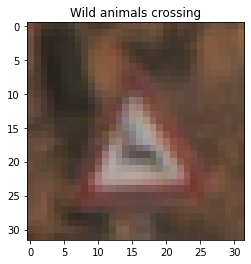

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(train_data['features'][300])
plt.title(names['SignName'][train_data['labels'][300]])
plt.show()

In [7]:
x_train , y_train = train_data['features'] , train_data['labels']
x_test , y_test = test_data['features'] , test_data['labels']
x_valid , y_valid = valid_data['features'] , valid_data['labels']

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense , Flatten, Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from glob import glob

In [9]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)

x_train = x_train.reshape(34799, 32, 32, 3)
x_test = x_test.reshape(12630, 32, 32, 3)
x_valid = x_valid.reshape(4410, 32, 32, 3)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255 , zoom_range = 0.3 , shear_range = 0.4 , rotation_range = 30 , horizontal_flip = True)
train_datagen.fit(x_train)
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(x_test)
valid_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen.fit(x_valid)

In [11]:
train_dataset = train_datagen.flow(x_train,y_train , batch_size = 16)
test_dataset = test_datagen.flow(x_test , y_test , batch_size = 16 )
valid_dataset = valid_datagen.flow(x_valid , y_valid , batch_size = 16)

In [12]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [13]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession 

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [17]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , input_shape = (32,32,3) , activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer = 'adam' , metrics = 'accuracy' , loss = 'categorical_crossentropy')

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 15)        4335      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 540)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [19]:
model.fit(train_dataset , validation_data = valid_dataset , epochs = 10)

Epoch 1/10
2175/2175 [==============================] - 32s 14ms/step - loss: 1.7395 - accuracy: 0.4755 - val_loss: 0.8530 - val_accuracy: 0.7497
Epoch 2/10
2175/2175 [==============================] - 31s 14ms/step - loss: 0.8605 - accuracy: 0.7164 - val_loss: 0.6510 - val_accuracy: 0.8018
Epoch 3/10
2175/2175 [==============================] - 30s 14ms/step - loss: 0.6429 - accuracy: 0.7865 - val_loss: 0.5475 - val_accuracy: 0.8306
Epoch 4/10
2175/2175 [==============================] - 30s 14ms/step - loss: 0.5405 - accuracy: 0.8226 - val_loss: 0.4715 - val_accuracy: 0.8442
Epoch 5/10
2175/2175 [==============================] - 30s 14ms/step - loss: 0.4750 - accuracy: 0.8447 - val_loss: 0.6059 - val_accuracy: 0.8252
Epoch 6/10
2175/2175 [==============================] - 30s 14ms/step - loss: 0.4292 - accuracy: 0.8577 - val_loss: 0.4793 - val_accuracy: 0.8651
Epoch 7/10
2175/2175 [==============================] - 31s 14ms/step - loss: 0.3980 - accuracy: 0.8694 - val_loss: 0.4441 -

In [27]:
from sklearn.metrics import classification_report 
import numpy as np 

In [28]:
predictions = np.argmax(model.predict(x_test), axis = 1 )
y_test = np.argmax(y_test, axis=1)

In [29]:
predictions

array([16,  1, 38, ..., 38,  7, 10])

In [33]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        60
           1       0.60      0.88      0.71       720
           2       0.52      0.91      0.66       750
           3       0.57      0.45      0.50       450
           4       0.94      0.80      0.87       660
           5       0.59      0.10      0.17       630
           6       1.00      0.34      0.51       150
           7       0.72      0.73      0.73       450
           8       0.84      0.78      0.81       450
           9       0.85      0.95      0.89       480
          10       0.99      0.70      0.82       660
          11       0.77      0.90      0.83       420
          12       0.99      0.88      0.94       690
          13       0.96      0.98      0.97       720
          14       1.00      1.00      1.00       270
          15       1.00      0.63      0.78       210
          16       0.92      0.92      0.92       150
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model.save('traffic.h5')

In [39]:
import tensorflow
final_model = tensorflow.keras.models.load_model('traffic.h5')

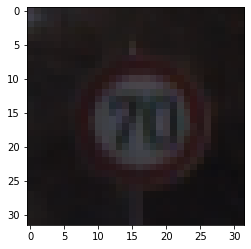

In [74]:
plt.imshow(x_test[20])

In [75]:
new_img = x_test[20]
new_img = new_img.reshape(1 , 32,32,3)
label = np.argmax(final_model.predict(new_img))
names['SignName'][label]

'Speed limit (70km/h)'